# **4 Python Static**
파이썬을 활용한 금융분석

<br>
### **review Python Data & Datum**
Python 기본문법 - 기본문법 등을 아래의 3가지 서랍속에 체계적 정리하기 
1. Datum &nbsp;&nbsp; : &nbsp;&nbsp; 숫자, &nbsp;"문자" 
1. Data &nbsp;&nbsp; : &nbsp; [list], &nbsp; {dict}, &nbsp; (tuple,)
1. Function : indent, 모듈, 클래스, 함수, 메소드(추가 입력값 필요, 추가 입력값 불필요)
1. []의 함수적 활용 
    1. 색인기능 [index], [:slicing])
    1. 함수를 활용하여 데이터 생성 &nbsp; [ &nbsp; datum &nbsp;&nbsp; 1) for : 반복, 2) if :판단, 3) enumerate() :순번 integer 출력 ]
1. {}의 함수적 활용 
    1. 함수를 활용하여 데이터 생성 &nbsp; { &nbsp; key &nbsp; : &nbsp; value &nbsp;&nbsp; 1) for : 반복, 2) if :판단, 3) enumerate() :순번 integer 출력}
1. 연결기호 : ', ", '=',  [], {}, () (개별적 쓰임새와 숨은 의미들이 정해져 있다)

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. df.column이름
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()

<br>
## **1 기술통계 계산과 요약**
기본적인 수학/ 통계 메소드(함수)
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

<br>
### **01 기술통계**
엑셀의 함수를 더 쉽고, 빠르게 적용 가능하다

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame( np.arange(20).reshape((4,5)), 
                  index=['three','one','two','five'], 
                  columns=[ 'd','e','f','a','g'])
df

,d,e,f,a,g
three,0,1,2,3,4
one,5,6,7,8,9
two,10,11,12,13,14
five,15,16,17,18,19


In [2]:
# 
df.quantile()

d     7.5
e     8.5
f     9.5
a    10.5
g    11.5
Name: 0.5, dtype: float64

In [3]:
# 개별 컬럼의 합을 계산한 결과를 출력
# default :  axis = 0 , skipna = False 
# na값을 포함/ 제외하고 계산할 여부를 확인

df.sum( ) 

d    30
e    34
f    38
a    42
g    46
dtype: int64

In [4]:
df.sum( axis = 1 )

three    10
one      35
two      60
five     85
dtype: int64

In [5]:
# column 별 평균을 계산
df.mean( axis=0 , skipna = False )  # .tolist()

d     7.5
e     8.5
f     9.5
a    10.5
g    11.5
dtype: float64

In [6]:
# column 숫자 출력하기
df.count()

d    4
e    4
f    4
a    4
g    4
dtype: int64

In [7]:
# column 별 누적 합
df.cumsum()

,d,e,f,a,g
three,0,1,2,3,4
one,5,7,9,11,13
two,15,18,21,24,27
five,30,34,38,42,46


In [8]:
# column 별 누적 곱
df.cumprod()

,d,e,f,a,g
three,0,1,2,3,4
one,0,6,14,24,36
two,0,66,168,312,504
five,0,1056,2856,5616,9576


In [9]:
df.describe()

,d,e,f,a,g
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,7.500000,8.500000,9.500000,10.500000,11.500000
std,6.454972,6.454972,6.454972,6.454972,6.454972
min,0.000000,1.000000,2.000000,3.000000,4.000000
25%,3.750000,4.750000,5.750000,6.750000,7.750000
50%,7.500000,8.500000,9.500000,10.500000,11.500000
75%,11.250000,12.250000,13.250000,14.250000,15.250000
max,15.000000,16.000000,17.000000,18.000000,19.000000


In [10]:
df.pct_change() # 퍼센트 변화율을 출력

,d,e,f,a,g
three,NaN,NaN,NaN,NaN,NaN
one,inf,5.000000,2.500000,1.666667,1.250000
two,1.000000,0.833333,0.714286,0.625000,0.555556
five,0.500000,0.454545,0.416667,0.384615,0.357143


In [11]:
df.pct_change().plot(kind='line')

<br>
<br>
## **2 결측치(np.Nan) 제어하기**
<br>
### **01 결측치(np.Nan) 찾기**
전체의 표로 연산을 하려면, Table 데이터가 깨끗해야 한다
1.  sum(), cumsum() methods 계산 시 : NaN은 '0'으로 처리
1. mean(), std() 연산 시 : NaN은 분석 대상(population)에서 제외
1. DataFrame 칼럼 간 연산 시 : NaN이 하나라도 있으면 NaN 반환

출처: http://rfriend.tistory.com/261?category=675917 [R, Python 분석과 프로그래밍 (by R Friend)]

In [12]:
data  = pd.Series([4,-5,7],  index = ['seoul', 'daegu','busan'])
data2 = pd.Series([-4,3,-5], index = ['dajun', 'daegu','busan'])
df = pd.DataFrame( {'first_col': data, 'second_col': data2 }) 
df

,first_col,second_col
busan,7.0,-5.0
daegu,-5.0,3.0
dajun,NaN,-4.0
seoul,4.0,NaN


In [13]:
# 결측값을 제외한 데이터를 출력 
df.dropna()

,first_col,second_col
busan,7.0,-5.0
daegu,-5.0,3.0


In [14]:
# 결측치 데이터 위치 찾기
print(df.isnull().sum())
print(df[df.first_col.isnull()].index.tolist())
print(df[df.second_col.isnull()].index.tolist())

first_col     1
second_col    1
dtype: int64
['dajun']
['seoul']


<br>
### **02 결측치(np.Nan) 대체하기**
전체의 표로 연산을 하려면, Table 데이터가 깨끗해야 한다

In [15]:
df.fillna(0)

,first_col,second_col
busan,7.0,-5.0
daegu,-5.0,3.0
dajun,0.0,-4.0
seoul,4.0,0.0


In [16]:
# fill gaps forward  앞방향 데이터로 채우기
# limit=2 : 앞에서 끌어오는 데이터의 갯수를 제한하기
df.fillna(method='ffill',  limit=2)  

,first_col,second_col
busan,7.0,-5.0
daegu,-5.0,3.0
dajun,-5.0,-4.0
seoul,4.0,-4.0


In [17]:
# fill gaps backword  뒷방향 데이터로 채우기
df.fillna(method='bfill')

,first_col,second_col
busan,7.0,-5.0
daegu,-5.0,3.0
dajun,4.0,-4.0
seoul,4.0,NaN


In [18]:
# 평균 값으로 채우기
df.fillna(df.mean())                # 개별 columns의 평균으로 채우기
df.fillna(df.mean()['first_col'])   # 'first_col 컬럼의 평균으로 채우기

,first_col,second_col
busan,7.0,-5.0
daegu,-5.0,3.0
dajun,2.0,-4.0
seoul,4.0,2.0


<br>
### **03 보간법으로 결측치(np.Nan) 대체하기**
단일값이 아닌 규칙에 근거한 결측치 대체

In [19]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime

# making TimeSeries with missing values
datestrs   = ['12/1/2016', '12/03/2016', '12/04/2016', '12/10/2016']
dates      = pd.to_datetime(datestrs)
timeSeries = Series([1, np.nan, np.nan, 10], index=dates)
# http://rfriend.tistory.com/264?category=675917 [R, Python 분석과 프로그래밍 (by R Friend)]
print(timeSeries.index)
timeSeries

DatetimeIndex(['2016-12-01', '2016-12-03', '2016-12-04', '2016-12-10'], dtype='datetime64[ns]', freq=None)


2016-12-01     1.0
2016-12-03     NaN
2016-12-04     NaN
2016-12-10    10.0
dtype: float64

2016-12-01     1.0
2016-12-03     4.0
2016-12-04     7.0
2016-12-10    10.0
dtype: float64

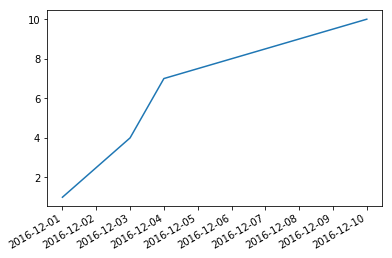

In [20]:
%matplotlib inline
# "선형비례"로 데이터를 보간한다
timeSeries.interpolate().plot()
timeSeries.interpolate()

2016-12-01     1.0
2016-12-03     3.0
2016-12-04     4.0
2016-12-10    10.0
dtype: float64

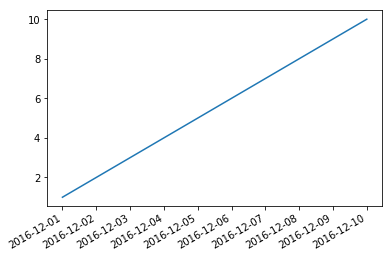

In [21]:
# 시계열 날짜 index를 기준으로 결측값 보간
timeSeries.interpolate(method='time').plot()
timeSeries.interpolate(method='time')

2016-12-01     1.0
2016-12-03     3.0
2016-12-04     4.0
2016-12-10    10.0
dtype: float64

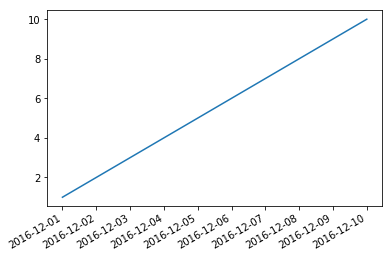

In [22]:
# value값에 비례하여 선형으로 보간한다
timeSeries.interpolate(method='values').plot()
timeSeries.interpolate(method='values')

In [23]:
# 보간의 갯수를 제한
timeSeries.interpolate(method='values', limit=1)

2016-12-01     1.0
2016-12-03     3.0
2016-12-04     NaN
2016-12-10    10.0
dtype: float64

In [24]:
# 보간의 갯수 와 방향을 제한
timeSeries.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

2016-12-01     1.0
2016-12-03     NaN
2016-12-04     4.0
2016-12-10    10.0
dtype: float64

<br><br>
## **3. map, reduce, lambda, filter**
시계열 데이터 처리하기

<br>
### **01 lambda**
1. 익명함수로, 메모리를 참조하지 않아서 연산 후 결과값만 남기고 나머지는 메모리에서 날린다
1. 메모리 절약, 및 대용량시 속도도 빠름
1. 초심자들에게는 개념이 익숙치 않아서 어렵지만, for 문에 비해 속도가 빠르므로 자주 익혀두자

In [25]:
# lambda : 익명함수로, 한줄 연산 뒤 바로 메모리에서 날린다
# Python 객체와 함수 모두, 메모리 주소값을 갖고서 연산을 하는지만
# lambda 함수를 사용하면, 어느 누구도 참조하지 않고 연산을 한다

sum_func = lambda a, b : a + b    # a, b 를 매개변수로 입력받고, a+b 결과값을 출력한다
sum_func(3,4)

7

In [26]:
sum_func = lambda a , b : a + int(b)  # 입력 매개변수 a, b 를 받는 함수로써 ':', 
                                      # a + int(b) 연산결과값을 출력 
sum_func(21,'9')

30

In [27]:
sum_func = lambda a , b, c : a + int(b) + len(c) 
sum_func(21, '9', 'text')

34

In [28]:
data = [i  for i in range(10)]
data

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
# list 반복객체에 lambda 적용하기
map(lambda x : str(x), data)

In [ ]:
# lambda를 '함수형 매개변수'로 활용 
lambda_plus = lambda x : x + 1  

print(lambda_plus(7))
add_with_transform(1,3,lambda_plus)

<br>
### **02 Map**
1. 함수를 **개별 index 데이터**에 **연결하는 함수** **(iterator)** cf)연결만!!! 한다..
1. **next()** 함수를 실행하면 연산이 단계적으로 실행  # 이런 노가도로는 안쓴다
1. **pandas.Series** 에서는 .apply()로 대체 가능하다

In [30]:
result = map(lambda i: i * i, data)
next(result)
next(result)  # 자료를 순차적으로 실행
next(result)  # 자료를 순차적으로 실행 
next(result)  # 자료를 순차적으로 실행

9

In [31]:
# 자료를 순차적으로 실행한 뒤
# 마지막엔 Stop Iteration 을 발생한다.
# next(result)

In [32]:
list(map(lambda x : str(x), data))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [33]:
[ map(lambda x : str(x), data) ]

In [34]:
# [ i  lambda x : str(x), data ]   # lambda는 익명함수일 뿐 반복문이 아니다!!!

In [35]:
# Pandas의 Series, DataFrame 객체에는
# .apply 메소드가 있어서 이를 활용하면 
# map() 함수 없이도, lambda 익명함수를 쉽게 적용 가능
data_series = pd.Series(data)
data_series.apply(lambda x : str(x) + '_text')

0    0_text
1    1_text
2    2_text
3    3_text
4    4_text
5    5_text
6    6_text
7    7_text
8    8_text
9    9_text
dtype: object

### **03 filter**
1. Map 은 연산함수를 인덱스 별로 모두 연결 및 출력을 한다면
1. filter 는 판단결과, **True 에 해당되는 값** 만 반환

In [36]:
data
# filter , lambda 를 쓸 경우
list(filter(lambda x : x % 2 == 0,  data))

[0, 2, 4, 6, 8]

In [37]:
# Pandas [ 판단문 ]  을 더 많이 쓴다
data_series[ data_series % 2 == 0]

0    0
2    2
4    4
6    6
8    8
dtype: int64

<br>
### **04 Reduce**
누적합 값만 남기고, 나머지는 버린다. (차원축소)

In [38]:
# Python 3 에서 별도 함수로 빠짐
# reduce 만 [1,2,3,4,5] 1개의 데이터 목록임에도 2개의 매개변수를 지정한다
# a : index 데이터
# b : 지금까지의 누적합
from functools import reduce
reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])

15

In [39]:
# Python 3 에서 별도 함수로 빠짐
# reduce 만 [1,2,3,4,5] 1개의 데이터 목록임에도 2개의 매개변수를 지정한다
# x : 직전 index 데이터로 reduce 연산후 날린다
# y : 해당 index 데이터
reduce(lambda x, y : x-y, [1, 2, 3, 4, 5])

-13

In [40]:
# 문제1. reduce 활용하여 최대값 구하기
# 누적합이 크면 누적합을, 인덱스 값이 크면 인덱스 값을 출력
reduce(lambda a,b : a   if a > b else   b ,  [1,50,9,10])

50

#### **Quiz**
       1. range(100)  의 자료들 중  13의 배수만 filter 한 list를 출력하라
       1. range(100)  pd.Series 데이터를  13의 배수만 filter 한 결과를 출력하라||

<br><br>
## **4. Time Series**
시계열 데이터 처리하기

<br>
### **01 DateTimeSeries**
시간 데이터 관리하기

In [41]:
from time import time
time()   
# sec 단위로 출력

1522323909.1105292

In [42]:
# Cell 내부 연산하는데 걸린시간 확인하기
t0 = time()
for i in range(100_000_000):
    pass
int( time() - t0 )

3

<br>
### **02 Date & Time**
날짜와 시간관리

In [43]:
# Date and time
from datetime import datetime
dt = datetime.now()
dt

datetime.datetime(2018, 3, 29, 20, 45, 12, 157325)

In [44]:
# 날짜 정보의 필요한 부분만 출력가능
print('year'   , dt.year, 
      '\nmonth'  , dt.month, 
      '\nday'    , dt.day , 
      '\nhour'   , dt.hour, 
      '\nminute' , dt.minute, 
      '\nsecond' , dt.second, 
      dt.microsecond)

year 2018 
month 3 
day 29 
hour 20 
minute 45 
second 12 157325


<br>
### **03 Time stamp  & Date**
날짜와 시간관리 데이터 상호교환

In [45]:
# time stamp 시초값 추출
datetime.fromtimestamp(0)

datetime.datetime(1970, 1, 1, 9, 0)

In [46]:
# time() 결과를 Datetime 형식으로 변환
now = time()
print(now)
datetime.fromtimestamp(now)

1522323912.1921825


datetime.datetime(2018, 3, 29, 20, 45, 12, 192183)

In [47]:
# 임의의 기간을 datetime 포맷으로 변환하기
date = datetime(2017, 10, 21, 16, 29, 0)
date

datetime.datetime(2017, 10, 21, 16, 29)

In [48]:
# datetime 출력포맷 임의로 변경하기
date.strftime('%Y/%m/%d %H:%M:%S')

'2017/10/21 16:29:00'

In [49]:
# datetime 출력포맷 임의로 변경하기
date.strftime('%Y/%m/%d')

'2017/10/21'

In [50]:
# datetime 출력포맷 임의로 변경하기
date.strftime('%Y-%m-%d')

'2017-10-21'

<br>
### **04 Datetime in Pandas** 
날짜와 시간관리 데이터 상호교환

<br>
#### **1) pandas.date_range()**
규칙적인 일별데이터가 필요할 떄

In [51]:
pd.date_range('2017/01/01','2017/01/31')

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range('2017-07-01', periods=30)

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08',
               '2017-07-09', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-15', '2017-07-16',
               '2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20',
               '2017-07-21', '2017-07-22', '2017-07-23', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-29', '2017-07-30'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range(end = '2017-07-01', periods=30)

DatetimeIndex(['2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
               '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29',
               '2017-06-30', '2017-07-01'],
              dtype='datetime64[ns]', freq='D')

In [54]:
# B : 영업일 (주말은 제외)
pd.date_range(end = '2017-07-01', periods=30, freq='B')  

DatetimeIndex(['2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-29', '2017-05-30', '2017-05-31',
               '2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [55]:
# BM : 월 영업 마감일
pd.date_range(end = '2017-07-01', periods=30, freq='BM')  

DatetimeIndex(['2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
               '2015-05-29', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31',
               '2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', freq='BM')

In [56]:
# 시간정보를 포함해서 일자를 나열할 떄
pd.date_range('2017/8/8 09:09:09', periods=5)  #, normalize=True)

DatetimeIndex(['2017-08-08 09:09:09', '2017-08-09 09:09:09',
               '2017-08-10 09:09:09', '2017-08-11 09:09:09',
               '2017-08-12 09:09:09'],
              dtype='datetime64[ns]', freq='D')

In [57]:
# 시간정보를 '자정'으로 '정규화'가 필요할 떄
pd.date_range('2017/8/8 09:09:09', periods=5, normalize=True)

DatetimeIndex(['2017-08-08', '2017-08-09', '2017-08-10', '2017-08-11',
               '2017-08-12'],
              dtype='datetime64[ns]', freq='D')

In [58]:
# 시간정보를 '시간'간격으로 필요할 떄
pd.date_range('2017/8/1 12:12:12','2017/8/4', freq='4h')

DatetimeIndex(['2017-08-01 12:12:12', '2017-08-01 16:12:12',
               '2017-08-01 20:12:12', '2017-08-02 00:12:12',
               '2017-08-02 04:12:12', '2017-08-02 08:12:12',
               '2017-08-02 12:12:12', '2017-08-02 16:12:12',
               '2017-08-02 20:12:12', '2017-08-03 00:12:12',
               '2017-08-03 04:12:12', '2017-08-03 08:12:12',
               '2017-08-03 12:12:12', '2017-08-03 16:12:12',
               '2017-08-03 20:12:12'],
              dtype='datetime64[ns]', freq='4H')

In [59]:
# 시간정보를 '시간 분'간격으로 필요할 떄
pd.date_range('2017/8/1','2017/8/2', freq='1h30min')

DatetimeIndex(['2017-08-01 00:00:00', '2017-08-01 01:30:00',
               '2017-08-01 03:00:00', '2017-08-01 04:30:00',
               '2017-08-01 06:00:00', '2017-08-01 07:30:00',
               '2017-08-01 09:00:00', '2017-08-01 10:30:00',
               '2017-08-01 12:00:00', '2017-08-01 13:30:00',
               '2017-08-01 15:00:00', '2017-08-01 16:30:00',
               '2017-08-01 18:00:00', '2017-08-01 19:30:00',
               '2017-08-01 21:00:00', '2017-08-01 22:30:00',
               '2017-08-02 00:00:00'],
              dtype='datetime64[ns]', freq='90T')

<br>
#### **2) Datetime 데이터 포맷의 변환**
사용자에게 유용한 형태로 변환하기

In [60]:
# datetime 포맷을 일반 [ list ] 로 변환
date_list = pd.date_range('2017/01/01','2017/01/31').tolist()
date_list = [ ts.date()   for ts in date_list   ]   # a list of datetime.date's
date_list = [ str(date)   for date in date_list ]
date_list[:5]

['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05']

In [61]:
# 결과로 출력할 포맷을 변경
date_list = pd.date_range('2017/01/01','2017/01/11')
for date in date_list:
    print(date.strftime('%Y-%m-%d %H:%M:%S'))

2017-01-01 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00


In [62]:
# 결과로 출력할 포맷을 변경 - list 포맷으로 출력
date_list = pd.date_range('2017/01/01', '2017/01/11')
date = [date.strftime('%Y-%m-%d')   for date in date_list]
date

['2017-01-01',
 '2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-07',
 '2017-01-08',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11']

In [63]:
# 결과로 출력할 포맷을 변경 - list 포맷으로 출력
date_list = pd.date_range('2017/01/01', '2017/01/11')
date      = [str(date.date())  for date in date_list]
date

['2017-01-01',
 '2017-01-02',
 '2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-07',
 '2017-01-08',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11']

In [64]:
# 결과로 출력할 포맷을 변경 - list 포맷으로 출력
date_list = pd.date_range('2017/01/01', '2017/01/11')
date      = [str(date.time())  for date in date_list]
date

['00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00',
 '00:00:00']

In [65]:
# Iso Calendar 를 활용할 경우..
now     = datetime.now()
now_iso = datetime(now.year, now.month, now.day).isocalendar()
now_iso

(2018, 13, 4)

<br><br>
## **5  Pandas Pivot Table** 
대용량 데이터 Pivot Table 생성하기

http://pbpython.com/pandas-pivot-table-explained.html

<img src="http://pbpython.com/images/pivot-table-datasheet.png" align='left' width='500'>

In [1]:
# Excel 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_excel("./data/sales-funnel.xlsx")
df.head(3)

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending


In [2]:
# 'Status' 컬럼의 데이터를 'category' 타입으로 변환
df["Status"] = df["Status"].astype("category")
# 'category' 타입의 우선순위를 임의로 정의한다
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
Account     17 non-null int64
Name        17 non-null object
Rep         17 non-null object
Manager     17 non-null object
Product     17 non-null object
Quantity    17 non-null int64
Price       17 non-null int64
Status      17 non-null category
dtypes: category(1), int64(3), object(4)
memory usage: 1.2+ KB


In [3]:
# Pivot Table 만들기
# Name 별로 묶은 Pivot Table을 생성한다
#pd.pivot_table(df, index = ["Name"])

# 다층 인덱스를 갖는 Pivot Table
pd.pivot_table(df,
               index = ["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550.0,35000.0,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962.0,65000.0,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599.0,7000.0,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981.0,100000.0,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832.0,65000.0,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833.0,35000.0,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895.0,25000.0,1.500000


In [4]:
# index = 
# index 순서를 바꾸면, 공통된 그룹끼리 자동으로 묶는다
pd.pivot_table(df,
               index = ["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [5]:
# values = 
# (Default) value에서 정의한 "Price"는 mean() 평균값을 출력한다
pd.pivot_table(df,
               index  = ["Manager","Rep"], 
               values = ["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [6]:
# aggfunc =
# value에서 정의한 "Price"의 갯수와, 평균, np.sum 를 출력
pd.pivot_table(df,
               index   = ["Manager","Rep"],
               values  = ["Price"],
               aggfunc = [np.sum, len, np.mean])  # np.sum 1개만도 가능

sum   len          mean
                              Price Price         Price
Manager       Rep                                      
Debra Henley  Craig Booker    80000     4  20000.000000
              Daniel Hilton  115000     3  38333.333333
              John Smith      40000     2  20000.000000
Fred Anderson Cedric Moss    110000     4  27500.000000
              Wendy Yule     177000     4  44250.000000

In [7]:
# columns =
# 컬럼에 제품을 열거하여, 제품별 Pivot Table을 확인한다
# columns = 는 옵션으로 생각하고, 컬럼의 기본설정은 value= 로 정의를 한다
pd.pivot_table(df,
               index   = ["Manager","Rep"],
               values  = ["Price"],
               columns = ["Product"],
               aggfunc = [np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [8]:
# fill_value = 0
pd.pivot_table(df,
               index   = ["Manager","Rep"],
               values  = ["Price"],
               columns = ["Product"],
               aggfunc = [np.sum],
               fill_value = 0)           # np.Nan 데이터들을 모두 0으로 변환한다

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [9]:
pd.pivot_table(df,
               index      = ["Manager","Rep"],
               values     = ["Price","Quantity"],
               columns    = ["Product"],
               aggfunc    = [np.sum],
               fill_value = 0)

sum                                        \
                              Price                              Quantity   
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

In [11]:
# 컬럼과 인덱스를 정렬
pd.pivot_table(df,
               index      = ["Manager", "Rep", "Product"],
               values     = ["Price",   "Quantity"],
               aggfunc    = [np.sum, np.mean],
               fill_value = 0)        # margins = True)

sum            mean         
                                          Price Quantity  Price Quantity
Manager       Rep           Product                                     
Debra Henley  Craig Booker  CPU           65000        2  32500      1.0
                            Maintenance    5000        2   5000      2.0
                            Software      10000        1  10000      1.0
              Daniel Hilton CPU          105000        4  52500      2.0
                            Software      10000        1  10000      1.0
              John Smith    CPU           35000        1  35000      1.0
                            Maintenance    5000        2   5000      2.0
Fred Anderson Cedric Moss   CPU           95000        3  47500      1.5
                            Maintenance    5000        1   5000      1.0
                            Software      10000        1  10000      1.0
              Wendy Yule    CPU          165000        7  82500      3.5
                            Maintenance    7000        3   7000      3.0
                            Monitor        5000        2   5000      2.0

In [12]:
# margins = True 
# 컬럼의 합계 row를 추가한다
pd.pivot_table(df,index   = ["Manager","Rep","Product"],
               values     = ["Price","Quantity"],
               aggfunc    = [np.sum,np.mean],
               fill_value = 0,
               margins    = True)

sum            mean          
                                          Price Quantity  Price  Quantity
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500  1.000000
                            Maintenance    5000        2   5000  2.000000
                            Software      10000        1  10000  1.000000
              Daniel Hilton CPU          105000        4  52500  2.000000
                            Software      10000        1  10000  1.000000
              John Smith    CPU           35000        1  35000  1.000000
                            Maintenance    5000        2   5000  2.000000
Fred Anderson Cedric Moss   CPU           95000        3  47500  1.500000
                            Maintenance    5000        1   5000  1.000000
                            Software      10000        1  10000  1.000000
              Wendy Yule    CPU          165000        7  82500  3.500000
                            Maintenance    7000        3   7000  3.000000
                            Monitor        5000        2   5000  2.000000
All                                      522000       30  30705  1.764706